✅ Successfully loaded 'organoid_data_cleaned.csv'
Training data size: 120 samples
Testing data size: 30 samples

Training Model 1: Decision Tree...
Decision Tree Accuracy: 0.47

Training Model 2: Random Forest...
Random Forest Accuracy: 0.60

Training Model 3: Gradient Boosting...
Gradient Boosting Accuracy: 0.53

--- Final Detailed Scorecard (Based on Random Forest) ---
              precision    recall  f1-score   support

           0       0.63      0.89      0.74        19
           1       0.33      0.09      0.14        11

    accuracy                           0.60        30
   macro avg       0.48      0.49      0.44        30
weighted avg       0.52      0.60      0.52        30



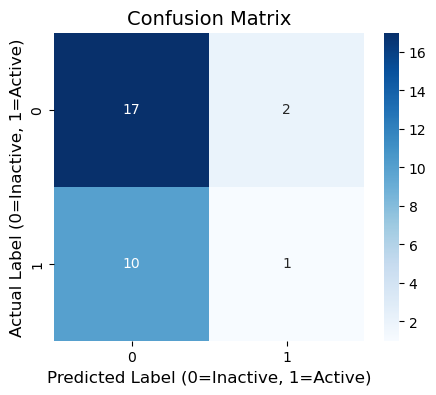


✅ Success! The best model (Random Forest) has been saved as 'my_best_model.pkl'


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib 

# =========================================================
# 1. PREPARE DATA
# =========================================================
# Read the cleaned data from Notebook 1
try:
    df = pd.read_csv('organoid_data_cleaned.csv')
    print("✅ Successfully loaded 'organoid_data_cleaned.csv'")
except FileNotFoundError:
    print("❌ Error: File not found. Please run the EDA notebook first.")

# X is features (all columns except the last one)
X = df.drop('Bio_Computer_State', axis=1)
# y is the target (the last column: active or inactive state)
y = df['Bio_Computer_State']

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {len(X_train)} samples")
print(f"Testing data size: {len(X_test)} samples")


# =========================================================
# 2. TRAIN MODELS
# =========================================================

# Model 1: Decision Tree
print("\nTraining Model 1: Decision Tree...")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_pred):.2f}")

# Model 2: Random Forest
print("\nTraining Model 2: Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.2f}")

# Model 3: Gradient Boosting (Bonus/Extra Model)
print("\nTraining Model 3: Gradient Boosting...")
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, gb_pred):.2f}")


# =========================================================
# 3. EVALUATION & VISUALIZATION
# =========================================================
print("\n--- Final Detailed Scorecard (Based on Random Forest) ---")
print(classification_report(y_test, rf_pred))

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') 
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label (0=Inactive, 1=Active)', fontsize=12)
plt.ylabel('Actual Label (0=Inactive, 1=Active)', fontsize=12)
plt.show()


# =========================================================
# 4. SAVE MODEL
# =========================================================
joblib.dump(rf_model, 'my_best_model.pkl')
print("\n✅ Success! The best model (Random Forest) has been saved as 'my_best_model.pkl'")
